In [1]:
# TODO : dev set for sequenced dataloader
# TODO : dev set that's a mix of trianing set instead of held out
# TODO : understand torch generator
# TODO : implement torch generator for trianing
# TODO : could we define param groups, one for the encoder, and put a lower learning rate? 
# i noticed unfrozen training loss is volatile
# TODO fix dropout lstm warning
# TODO : dev set for sequenced dataloader
# TODO : dev set that's a mix of trianing set instead of held out
# TODO : understand torch generator
# TODO : implement torch generator for trianing
# TODO : could we define param groups, one for the encoder, and put a lower learning rate? 
# i noticed unfrozen training loss is volatile
# TODO : allow for multiple dataloaders
# TODO : f1 score each epoch and add to plot_loss
# TODO : add best model epoch
# TODO : use a torch generator
# TODO : remove things after yield in train
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from lib.ekyn import *
from lib.env import *
import copy
from sage.utils import *

states = []
evals = []
model_name = 4

state = torch.load(f'{TMP_EXPERIMENTS_PATH}/{model_name}/state.pt',map_location='cpu',weights_only=False)
states.append(state)
state['name'] = f'{model_name}'

df = pd.DataFrame(states)

df['best_dev_f1'] = df['devf1i'][0][df['best_dev_loss_epoch'].item()]
df['best_dev_f1_epoch'] = torch.tensor(df['devf1i'][0]).argmax().item()
df['dev_f1_at_best_dev_f1_epoch'] = df['devf1i'][0][df['best_dev_f1_epoch'].item()]
df['test_f1_at_best_dev_loss_epoch'] = df['testf1i'][0][df['best_dev_loss_epoch'].item()]
df['test_f1_at_best_dev_f1_epoch'] = df['testf1i'][0][df['best_dev_f1_epoch'].item()]

display(df.set_index(keys='name')[['fold','widthi','depthi','best_dev_loss','best_dev_f1','best_dev_loss_epoch','best_dev_f1_epoch','test_f1_at_best_dev_loss_epoch','test_f1_at_best_dev_f1_epoch']])

,fold,widthi,depthi,best_dev_loss,best_dev_f1,best_dev_loss_epoch,best_dev_f1_epoch,test_f1_at_best_dev_loss_epoch,test_f1_at_best_dev_f1_epoch
name,,,,,,,,,
4,0,[64],[2],0.268735,0.788928,117,110,0.828799,0.836006


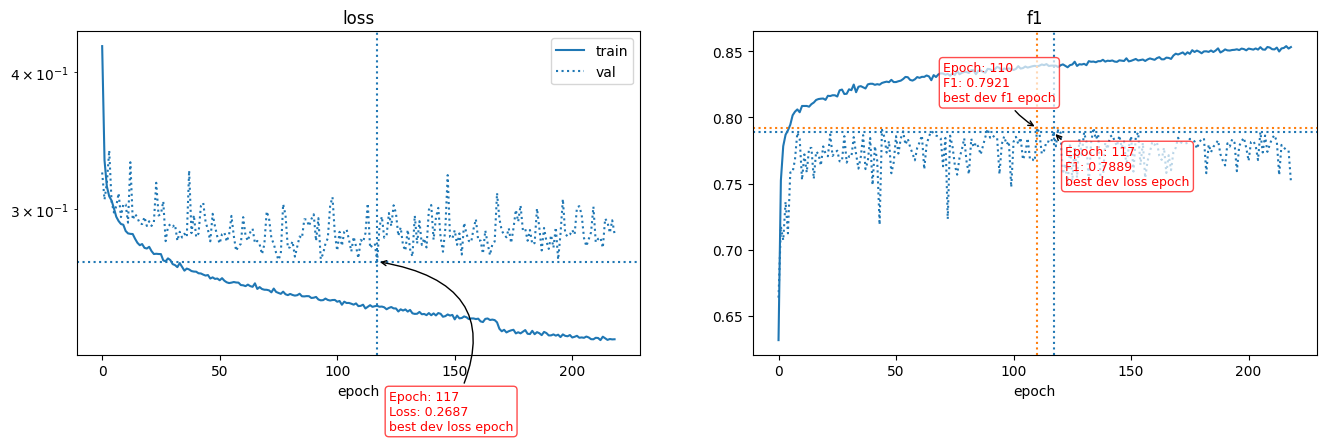

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4.2))

colors = ['C0', 'C1', 'C2', 'C3', 'C4']
for i, state in enumerate(df.iloc):
    # Plotting the loss
    axes[0].plot(state['trainlossi'], color=colors[i], linestyle='-', label='train')
    axes[0].plot(state['devlossi'], color=colors[i], linestyle=':', label='val')
    axes[0].axvline(state['best_dev_loss_epoch'], color=colors[i], linestyle=':')
    axes[0].axhline(state['best_dev_loss'], color=colors[i], linestyle=':')
    
    # Annotate the best loss point
    axes[0].annotate(f'Epoch: {state["best_dev_loss_epoch"]}\nLoss: {state["best_dev_loss"]:.4f}\nbest dev loss epoch', 
                     xy=(state['best_dev_loss_epoch'], state['best_dev_loss']), 
                     xytext=(state['best_dev_loss_epoch'] + 5, state['best_dev_loss'] - 0.08),
                     arrowprops=dict(facecolor='red', arrowstyle="->", connectionstyle="arc3,rad=.7"),
                     fontsize=9, color='red',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', alpha=0.7))
    
axes[0].set_yscale('log')
axes[0].legend()

for i, state in enumerate(df.iloc):
    # Plotting the F1 score
    axes[1].plot(state['trainf1i'], color=colors[i], linestyle='-')
    axes[1].plot(state['devf1i'], color=colors[i], linestyle=':')
    axes[1].axvline(state['best_dev_loss_epoch'], color=colors[i], linestyle=':')
    axes[1].axhline(state['best_dev_f1'], color=colors[i], linestyle=':')
    axes[1].axvline(state['best_dev_f1_epoch'], color=colors[i + 1], linestyle=':')
    axes[1].axhline(state['dev_f1_at_best_dev_f1_epoch'], color=colors[i + 1], linestyle=':')
    
    # Annotate the best F1 point
    axes[1].annotate(f'Epoch: {state["best_dev_loss_epoch"]}\nF1: {state["best_dev_f1"]:.4f}\nbest dev loss epoch', 
                     xy=(state['best_dev_loss_epoch'], state['best_dev_f1']), 
                     xytext=(state['best_dev_loss_epoch'] + 5, state['best_dev_f1'] - .04),
                     arrowprops=dict(facecolor='red', arrowstyle="->", connectionstyle="arc3,rad=-.2"),
                     fontsize=9, color='red',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', alpha=0.7))
    
    # Annotate the best F1 point
    axes[1].annotate(f'Epoch: {state["best_dev_f1_epoch"]}\nF1: {state["dev_f1_at_best_dev_f1_epoch"]:.4f}\nbest dev f1 epoch', 
                     xy=(state['best_dev_f1_epoch'], state['dev_f1_at_best_dev_f1_epoch']), 
                     xytext=(state['best_dev_f1_epoch'] - 40, state['dev_f1_at_best_dev_f1_epoch'] + .02),
                     arrowprops=dict(facecolor='red', arrowstyle="->", connectionstyle="arc3,rad=.2"),
                     fontsize=9, color='red',
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor='red', facecolor='white', alpha=0.7))

axes[0].set_title('loss')
axes[1].set_title('f1')
axes[0].set_xlabel('epoch')
axes[1].set_xlabel('epoch')

plt.savefig(f'fig1.jpg',dpi=200,bbox_inches='tight')
plt.show()

In [110]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from lib.ekyn import *
from lib.env import *
import copy
from sage.utils import *

states = []
evals = []
# for model in range(1,5):
for model in range(0,1):
    MODEL_ID = f'{model}'

    state = torch.load(f'{TMP_EXPERIMENTS_PATH}/{MODEL_ID}/state.pt',map_location='cpu',weights_only=False)
    states.append(state)
    state['name'] = f'{model}'

df = pd.DataFrame(states)

df['best_dev_f1'] = df['devf1i'][0][df['best_dev_loss_epoch'].item()]
df['best_dev_f1_epoch'] = torch.tensor(df['devf1i'][0]).argmax().item()
df['dev_f1_at_best_dev_f1_epoch'] = df['devf1i'][0][df['best_dev_f1_epoch'].item()]
df['test_f1_at_best_dev_loss_epoch'] = df['testf1i'][0][df['best_dev_loss_epoch'].item()]
df['test_f1_at_best_dev_f1_epoch'] = df['testf1i'][0][df['best_dev_f1_epoch'].item()]

display(df.set_index(keys='name')[['fold','widthi','depthi','best_dev_loss','best_dev_f1','best_dev_loss_epoch','best_dev_f1_epoch','test_f1_at_best_dev_loss_epoch','test_f1_at_best_dev_f1_epoch']])

,fold,widthi,depthi,best_dev_loss,best_dev_f1,best_dev_loss_epoch,best_dev_f1_epoch,test_f1_at_best_dev_loss_epoch,test_f1_at_best_dev_f1_epoch
name,,,,,,,,,
0,0,[64],[2],0.277519,0.770936,44,29,0.854131,0.856207


Getting Downsampled Data at 100 Hz!
train_ids ['F1-1', 'C1-0', 'A1-1', 'E1-0', 'A4-0', 'B1-0', 'E4-0', 'F1-0', 'C4-1', 'D1-0', 'B3-1', 'A1-0', 'C4-0', 'F5-1']
dev_ids ['E4-1']
test_ids ['E2-1']


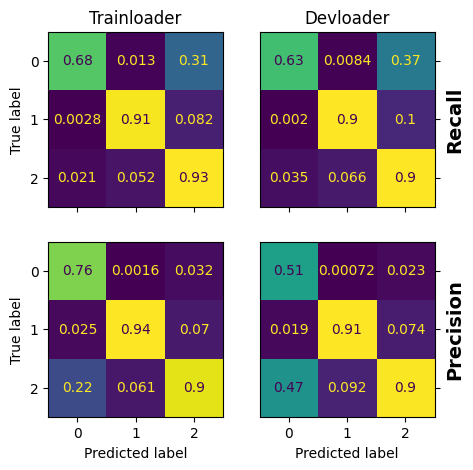

In [16]:
# for state in states:
model = copy.deepcopy(state['model'])
model.load_state_dict(state['best_model_wts_dev_loss'])
dataloaders = get_dataloaders(**state)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5), sharex=True, sharey=True)

loss, y_true, y_pred = evaluate(dataloader=dataloaders['trainloader'], model=model, criterion=state['criterion'], device='cuda')
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true', colorbar=False, ax=axes[0, 0])
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='pred', colorbar=False, ax=axes[1, 0])

loss, y_true, y_pred = evaluate(dataloader=dataloaders['devloader'], model=model, criterion=state['criterion'], device='cuda')
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true', colorbar=False, ax=axes[0, 1])
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='pred', colorbar=False, ax=axes[1, 1])

# Set titles for each column
axes[0, 0].set_title('Trainloader')
axes[0, 1].set_title('Devloader')

# Clear x labels for the top row
axes[0, 0].set_xlabel('')
axes[0, 1].set_xlabel('')

# Clear y labels for the right column
axes[0, 1].set_ylabel('')
axes[1, 1].set_ylabel('')

# Add y labels on the right-hand side, bigger and bold
axes[0, 1].yaxis.tick_right()
axes[0, 1].yaxis.set_label_position("right")
axes[0, 1].set_ylabel('Recall', fontsize=14, fontweight='bold')

axes[1, 1].yaxis.tick_right()
axes[1, 1].yaxis.set_label_position("right")
axes[1, 1].set_ylabel('Precision', fontsize=14, fontweight='bold')

# Display the plot
plt.savefig('fig2.jpg',dpi=200,bbox_inches='tight')

Getting Downsampled Data at 100 Hz!
train_ids ['F1-1', 'C1-0', 'A1-1', 'E1-0', 'A4-0', 'B1-0', 'E4-0', 'F1-0', 'C4-1', 'D1-0', 'B3-1', 'A1-0', 'C4-0', 'F5-1']
dev_ids ['E4-1']
test_ids ['E2-1']


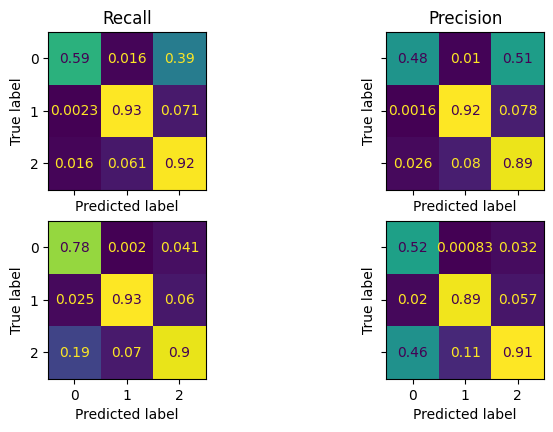

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,4.2))

colors = ['C0','C1','C2','C3','C4']
for i,state in enumerate(df.iloc):
    axes[0].plot(state['trainlossi'],color=colors[i],linestyle='-',label='train')
    axes[0].plot(state['devlossi'],color=colors[i],linestyle=':',label='val')
    # axes[0].plot(state['testlossi'],color=colors[i],linestyle='--',label='test')
    axes[0].axvline(state['best_dev_loss_epoch'],color=colors[i],linestyle=':',)
    axes[0].axhline(state['best_dev_loss'],color=colors[i],linestyle=':',)
    # axes[0].axhline(state['testlossi'][state['best_dev_loss_epoch']],color=colors[i],linestyle='--')
plt.yscale('log')
axes[0].set_ylim([.15,.4])
axes[0].legend()
for i,state in enumerate(df.iloc):
    axes[1].plot(state['devf1i'],color=colors[i],linestyle=':')
    # axes[1].plot(state['testf1i'],color=colors[i],linestyle='--')
    axes[1].axvline(state['best_dev_loss_epoch'],color=colors[i],linestyle=':')
    axes[1].axhline(state['best_dev_f1'],color=colors[i],linestyle=':')
    # axes[1].axvline(state['best_dev_loss_epoch'],color=colors[i],linestyle=':')
    axes[1].axvline(state['best_dev_f1_epoch'],color=colors[i+1],linestyle=':')
    axes[1].axhline(state['dev_f1_at_best_dev_f1_epoch'],color=colors[i+1],linestyle=':')
    # axes[1].axvline(torch.tensor(state['devf1i']).argmax(),color=colors[i],linestyle='--')
    # axes[1].axhline(state['testf1i'][state['best_dev_loss_epoch']],color=colors[i],linestyle=':')
    # axes[1].axhline(state['testf1i'][torch.tensor(state['devf1i']).argmax()],color=colors[i],linestyle='--')

axes[0].set_title('loss')
axes[1].set_title('f1')
axes[0].set_xlabel('epoch')
axes[1].set_xlabel('epoch')
# plt.yscale('log')
# plt.ylim([.85,.95])
# plt.savefig('out.jpg')

In [ ]:

df.widthi = df.widthi.astype(str)
df = df.reset_index()
df = df[df['fold'] == 0]
df.loc[:4,'type'] = 'encoder'
df.loc[4:,'type'] = 'lstm'
df.loc[:4,'encoder_name'] = df.loc[:4,'name']
df['encoder_experiment_name'] = df['encoder_experiment_name'].apply(lambda x: str(x).split('/')[-1] if not pd.isna(x) else x)
df.loc[4:,'encoder_name'] = df.loc[4:,'encoder_experiment_name']
df = df.drop(['encoder_experiment_name'],axis=1)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='encoder_name', y='best_dev_loss', hue='type')
plt.xlabel('Encoder Name')
plt.ylabel('Best Dev Loss')
plt.title('Comparison of Best Dev Loss between Encoders and Corresponding LSTMs')
plt.show()

In [ ]:

df['encoder_name'] = df['name']
display(df)
sns.barplot(data=df,x='fold',y='best_dev_loss',hue='widthi')

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,4.2))

colors = ['C0','C1','C2','C3','C4']
for i,state in enumerate(states):
    axes[0].plot(state['trainlossi'],color=colors[i],linestyle='-',label=state['name'])
    axes[0].plot(state['devlossi'],color=colors[i],linestyle=':')
    axes[0].plot(state['testlossi'],color=colors[i],linestyle='--')
    axes[0].axvline(state['best_dev_loss_epoch'],color=colors[i],linestyle=':',)
    axes[0].axhline(state['best_dev_loss'],color=colors[i],linestyle=':',)
    axes[0].axhline(state['testlossi'][state['best_dev_loss_epoch']],color=colors[i],linestyle='--')
plt.yscale('log')
axes[0].set_ylim([.15,.3])
axes[0].legend()
for i,state in enumerate(states):
    axes[1].plot(state['devf1i'],color=colors[i],linestyle=':')
    axes[1].plot(state['testf1i'],color=colors[i],linestyle='--')
    axes[1].axvline(state['best_dev_loss_epoch'],color=colors[i],linestyle=':')
    axes[1].axvline(torch.tensor(state['devf1i']).argmax(),color=colors[i],linestyle='--')
    axes[1].axhline(state['testf1i'][state['best_dev_loss_epoch']],color=colors[i],linestyle=':')
    axes[1].axhline(state['testf1i'][torch.tensor(state['devf1i']).argmax()],color=colors[i],linestyle='--')
# plt.yscale('log')
# plt.ylim([.85,.95])
# plt.savefig('out.jpg')

In [ ]:
evals = []
for state in states:
    model = copy.deepcopy(state['model'])
    model.load_state_dict(state['best_model_wts_dev_loss'])
    trainloader,testloader = get_sequenced_dataloaders_loo(**state)
    evals.append(evaluate(dataloader=testloader,model=model,criterion=state['criterion'],device='cuda'))
for loss,y_true,y_pred in evals:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4.5))
    ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='true',colorbar=False,ax=axes[0])
    ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='pred',colorbar=False,ax=axes[1])
    axes[0].set_title('Recall')
    axes[1].set_title('Precision')
    plt.suptitle(f'f1 : {f1_score(y_true,y_pred,average="macro"):.3f}   loss: {loss:.3f}')

In [ ]:
for loss,y_true,y_pred in evals:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4.5))
    ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='true',colorbar=False,ax=axes[0])
    ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='pred',colorbar=False,ax=axes[1])
    axes[0].set_title('Recall')
    axes[1].set_title('Precision')
    plt.suptitle(f'f1 : {f1_score(y_true,y_pred,average="macro"):.3f}   loss: {loss:.3f}')

,hidden_size,batch_size,encoder_name,sequence_length,bidirectional,fold,frozen_encoder
0,32,512,4,7,False,0,True


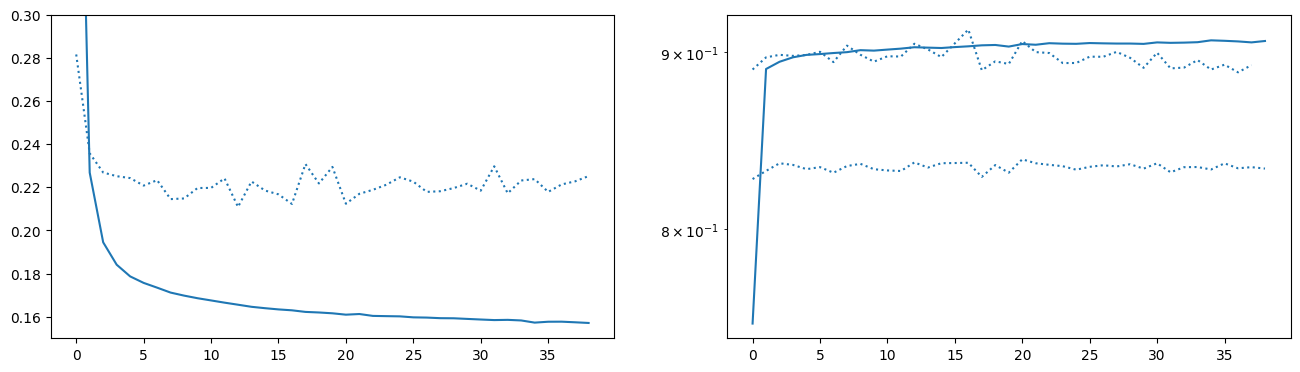

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from lib.ekyn import *
from lib.env import *
import copy
from sage.utils import *

states = []
for model_name in [5]:
    state = torch.load(f'{TMP_EXPERIMENTS_PATH}/{model_name}/state.pt',map_location='cpu',weights_only=False)
    states.append(state)

df = pd.DataFrame(states)

display(df[['hidden_size','batch_size','encoder_name','sequence_length','bidirectional','fold','frozen_encoder']])

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,4.2))

colors = ['C0','C1','C2','C3','C4']
for i,state in enumerate(states):
    axes[0].plot(state['trainlossi'],color=colors[i],linestyle='-')
    axes[0].plot(state['devlossi'],color=colors[i],linestyle=':')
plt.yscale('log')
axes[0].set_ylim([.15,.3])
for i,state in enumerate(states):
    axes[1].plot(state['trainf1i'],color=colors[i],linestyle='-')
    axes[1].plot(state['devf1i'],color=colors[i],linestyle=':')
    axes[1].plot(state['testf1i'],color=colors[i],linestyle=':')

In [ ]:
evals = []
for state in states:
    model = copy.deepcopy(state['model'])
    model.load_state_dict(state['best_model_wts_dev_loss'])
    dataloaders = get_dataloaders(**state)
    evals.append(evaluate(dataloader=dataloaders['trainloader'],model=model,criterion=state['criterion'],device='cuda'))

for loss,y_true,y_pred in evals:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4.5))
    ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='true',colorbar=False,ax=axes[0])
    ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='pred',colorbar=False,ax=axes[1])
    axes[0].set_title('Recall')
    axes[1].set_title('Precision')
    plt.suptitle(f'f1 : {f1_score(y_true,y_pred,average="macro"):.3f}   loss: {loss:.3f}')

    ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='true',colorbar=False,ax=axes[0])
    ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='pred',colorbar=False,ax=axes[1])
    axes[0].set_title('Recall')
    axes[1].set_title('Precision')
    plt.suptitle(f'f1 : {f1_score(y_true,y_pred,average="macro"):.3f}   loss: {loss:.3f}')